# **Mileage Prediction - Regression Analysis**

# **Objective**

The primary objective of this project is to develop a predictive model for making assumptions of the mileage of a vehicles. The project aims to create a regression model that can properly predict or assume the mileage of a given vehicle accurately.

# Data Source

The data source is taken from [Kaggle | Seaborn Practice](http://https://www.kaggle.com/datasets/litsufu/seaborn-practice)

# Import library

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [20]:
data = pd.read_csv("/kaggle/input/seaborn-practice/mpg.csv")

# Describe Data

In [21]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Data Visualisation

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


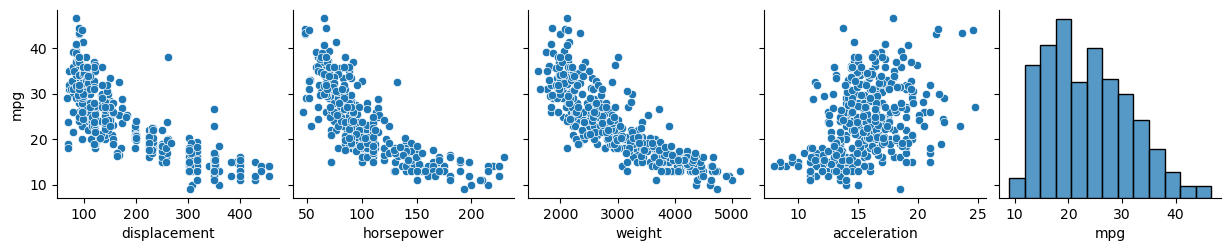

In [22]:
sns.pairplot(data , x_vars = ['displacement' ,'horsepower' , 'weight' , 'acceleration' , 'mpg'] , y_vars = ['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

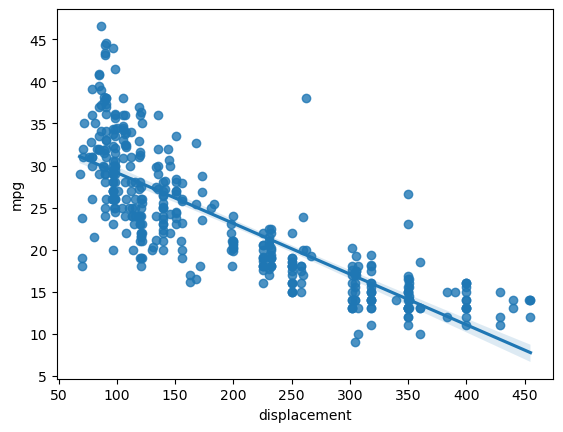

In [23]:
sns.regplot(x = 'displacement' , y = 'mpg' , data = data)

# Data preprocessing

In [24]:
data.shape

(398, 9)

In [25]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [27]:
data.dropna(inplace = True)

# Define Target Variable (y) and Feature Variables (X)

In [28]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [29]:
y = data['mpg']
x = data[['displacement', 'horsepower', 'weight', 'acceleration']]

In [30]:
x.shape

(392, 4)

In [31]:
y.shape

(392,)

# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2529)

# Modeling

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [36]:
model.intercept_

45.84620249789292

In [37]:
model.coef_

array([-0.007859  , -0.05202824, -0.0048651 , -0.05998945])

# Prediction

In [38]:
y_predict = model.predict(x_test)

In [39]:
y_predict

array([18.45029029, 15.11872575, 14.25951901, 23.63777162, 29.77227939,
       23.78289678, 26.46274613, 24.63477759, 15.10361067, 11.92089347,
       24.03667612, 28.03774179, 31.7791986 , 31.04942136, 18.34939414,
       19.34562679, 28.14901371, 32.26833498, 31.23336778, 27.1706607 ,
       18.90264044, 22.69158865, 26.30616149, 32.53334114, 20.7455229 ,
        8.43604922, 21.96939005, 18.16644283, 24.9187207 , 14.95041612,
       23.27573018, 17.10008397,  9.28416594, 30.02859334, 20.49341373,
       29.16402497, 24.1851619 , 21.82468561, 10.45764414, 12.99758931,
       21.55287965, 19.9763373 ,  5.81701795, 17.83479167, 22.69872144,
       29.39987303, 13.2638446 , 25.84303202, 29.29886179, 22.44116443,
       22.30857618, 16.57432268, 24.06827363, 30.19019859, 10.04817173,
        9.3533171 , 28.14495274, 23.67665202, 20.07936568, 30.77322956,
       20.95405256, 26.72684739, 23.16157669, 14.10789682, 24.37223149,
       26.84731155, 15.26437637, 24.21355   , 30.81705563, 14.86

# Model Accuracy

In [40]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [41]:
mean_absolute_error(y_test, y_predict)

3.2128193572784176

In [42]:
mean_absolute_percentage_error(y_test, y_predict)

0.14486145216628077

In [43]:
r2_score(y_test, y_predict)

0.7174961864188243